# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Step 1: Load the data

In [2]:
data = pd.read_csv('credit_card_transactions.csv')

# Step 2: Data Cleaning

In [3]:
# Drop unnecessary columns (e.g., 'Unnamed: 0')
data.drop(columns=['Unnamed: 0'], inplace=True)

# Fill missing values for numerical columns with mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Fill missing values for categorical columns with mode
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])


# Step 3: Encoding categorical variables

In [4]:
# Drop columns that are not useful for analysis
columns_to_drop = ['first', 'last', 'street', 'trans_date_trans_time', 'dob', 'trans_num']
data.drop(columns=columns_to_drop, inplace=True)

# Encode categorical columns using LabelEncoder
categorical_cols = ['category', 'merchant', 'gender', 'city', 'state', 'job']
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Verify encoding
print(data.head())

             cc_num  merchant  category     amt  gender  city  state    zip  \
0  2703186189652095       514         8    4.97       0   526     27  28654   
1      630423337322       241         4  107.23       0   612     47  99160   
2    38859492057661       390         0  220.11       1   468     13  83252   
3  3534093764340240       360         2   45.00       1    84     26  59632   
4   375534208663984       297         9   41.96       1   216     45  24433   

       lat      long  city_pop  job   unix_time  merch_lat  merch_long  \
0  36.0788  -81.1781      3495  370  1325376018  36.011293  -82.048315   
1  48.8878 -118.2105       149  428  1325376044  49.159047 -118.186462   
2  42.1808 -112.2620      4154  307  1325376051  43.150704 -112.154481   
3  46.2306 -112.1138      1939  328  1325376076  47.034331 -112.561071   
4  38.4207  -79.4629        99  116  1325376186  38.674999  -78.632459   

   is_fraud  merch_zipcode  
0         0   28705.000000  
1         0   46825.75

# Step 4: Train-Test Split

In [5]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Data Visualization (New Additions)

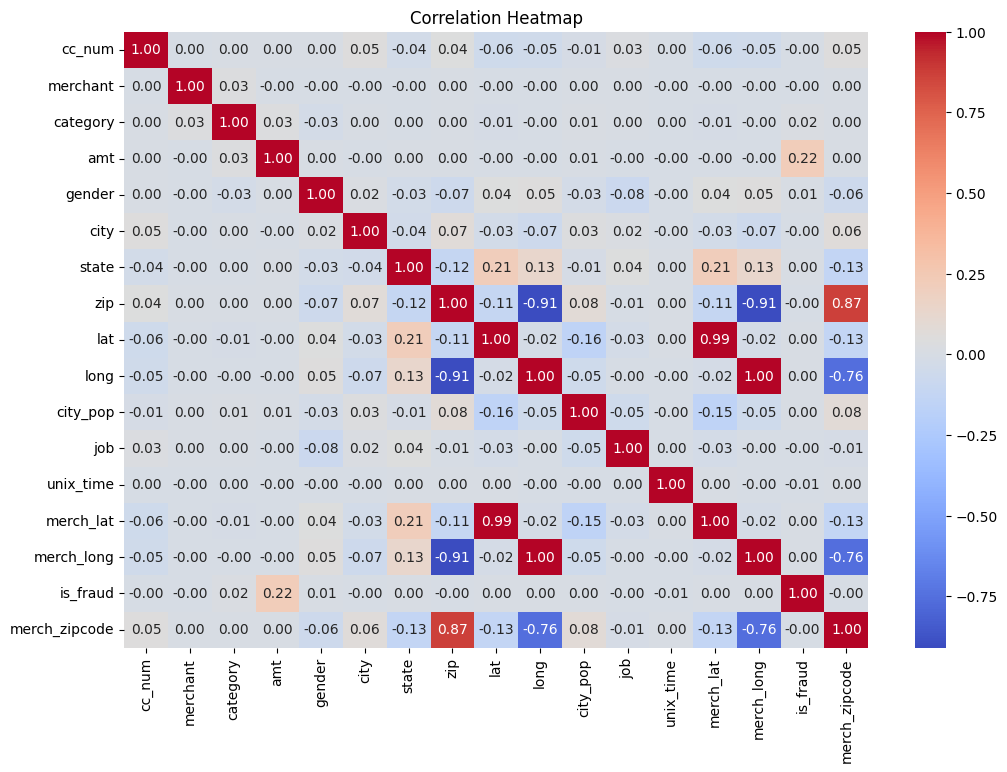

C:\Users\Tanzeem\AppData\Local\Temp\ipykernel_19740\1358840179.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=data, palette='viridis')


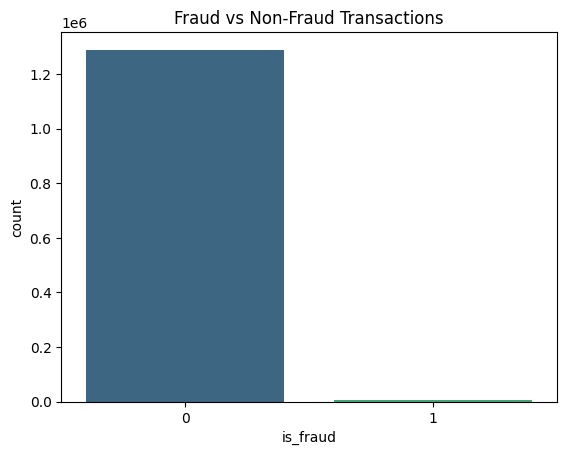

In [6]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))

# Select only numeric columns
numeric_cols = data.select_dtypes(include=['number'])
corr = numeric_cols.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# Distribution of Target Variable
sns.countplot(x='is_fraud', data=data, palette='viridis')
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()


# Step 6: Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train a Logistic Regression Model

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred_lg = model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred_lg))
print("Classification Report:\n", classification_report(y_test, y_pred_lg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lg))

Accuracy Score: 0.9935373249049493
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    386718
           1       0.00      0.00      0.00      2285

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003

Confusion Matrix:
 [[386489    229]
 [  2285      0]]


# Step 8: Train Random Forest Classifier

In [8]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=42)

# Step 9: Evaluate Model

Accuracy Score: 0.9971516929175354
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386718
           1       0.86      0.61      0.72      2285

    accuracy                           1.00    389003
   macro avg       0.93      0.81      0.86    389003
weighted avg       1.00      1.00      1.00    389003



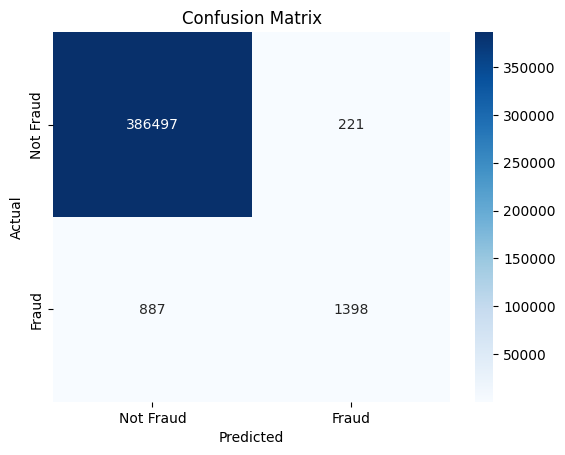

In [9]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy}')

# Classification Report
print('Classification Report:\n', classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 10: Feature Importance Visualization

C:\Users\Tanzeem\AppData\Local\Temp\ipykernel_19740\1070477464.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


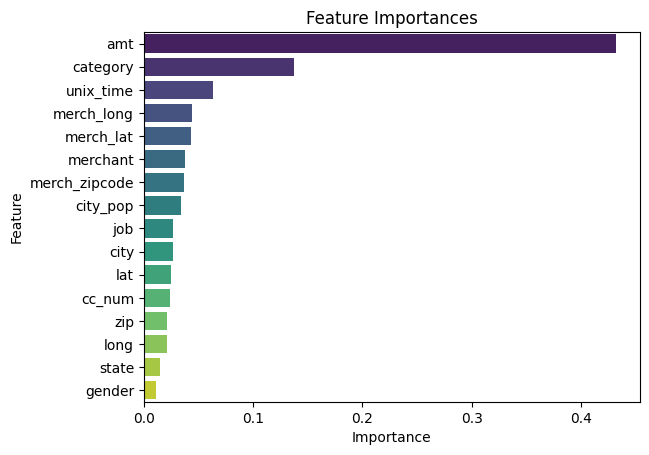

In [10]:
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances')
plt.show()


# Step 11: ROC Curve

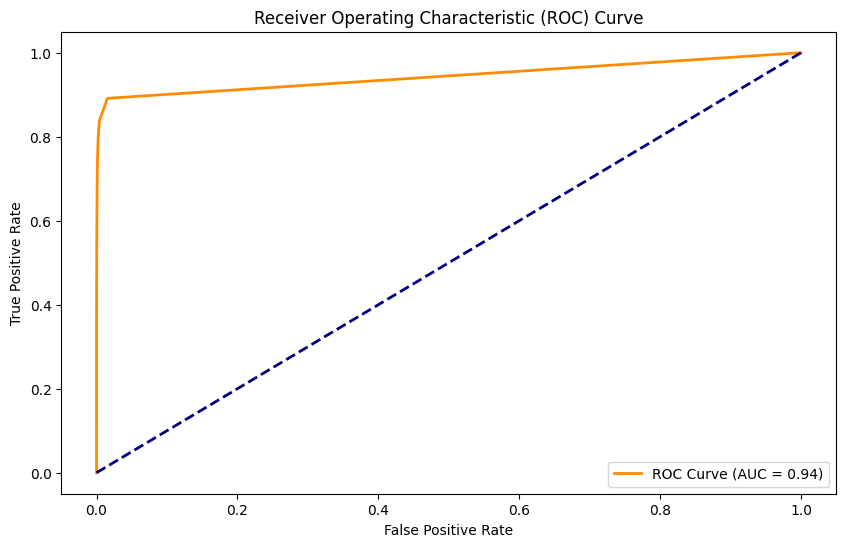

In [11]:
y_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
